In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data sets
leagues_file = "../../../data/team_player/cleaned_final/leagues.csv"
leagues_df = pd.read_csv(leagues_file)
del leagues_df["Unnamed: 0"]
leagues_df.dropna(inplace=True)
leagues_df.describe()

,Ranking,Year,Points,Goals+,Goals-,avg age,avg heights (cm),avg weight (kg),avg player rating,avg player value (EU),avg player wage,Shots pg,Yellowcard,RedCard,Possession%,Pass%,AerialsWon,Transfer Spend (Euros),MA
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,2.330000e+02,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,8.377682,2016.549356,58.678112,40.188841,29.120172,25.089828,182.166052,75.961416,73.763605,8.462924e+06,41558.407725,13.368240,95.896996,3.596567,51.568240,80.148498,16.376395,67.121609,59.378455
std,5.239424,1.686256,17.610838,18.081674,14.880361,1.093800,1.489371,1.663379,2.927316,6.915871e+06,36630.271976,2.410524,121.325501,2.241918,4.975927,4.626471,3.557811,62.253450,48.656103
min,1.000000,2014.000000,20.000000,11.000000,6.000000,22.640000,178.120000,71.300000,67.150000,0.000000e+00,0.000000,8.200000,37.000000,0.000000,40.700000,70.000000,9.100000,0.000000,1.080000
25%,4.000000,2015.000000,45.000000,27.000000,19.000000,24.300000,181.180000,74.910000,71.580000,4.115769e+06,16152.000000,11.600000,64.000000,2.000000,48.200000,76.400000,14.000000,21.314000,21.200000
50%,8.000000,2017.000000,56.000000,36.000000,24.000000,25.030000,182.330000,75.850000,73.410000,6.671969e+06,33273.000000,12.900000,78.000000,3.000000,51.000000,80.200000,16.100000,48.150000,46.650000
75%,12.000000,2018.000000,70.000000,48.000000,38.000000,25.750000,183.180000,77.060000,75.850000,1.231379e+07,59606.000000,15.300000,93.000000,5.000000,55.200000,83.800000,18.300000,92.340000,84.230000
max,20.000000,2019.000000,100.000000,118.000000,73.000000,28.230000,186.240000,80.300000,82.380000,3.179808e+07,188833.000000,19.600000,971.000000,9.000000,66.400000,89.300000,27.100000,348.750000,236.880000


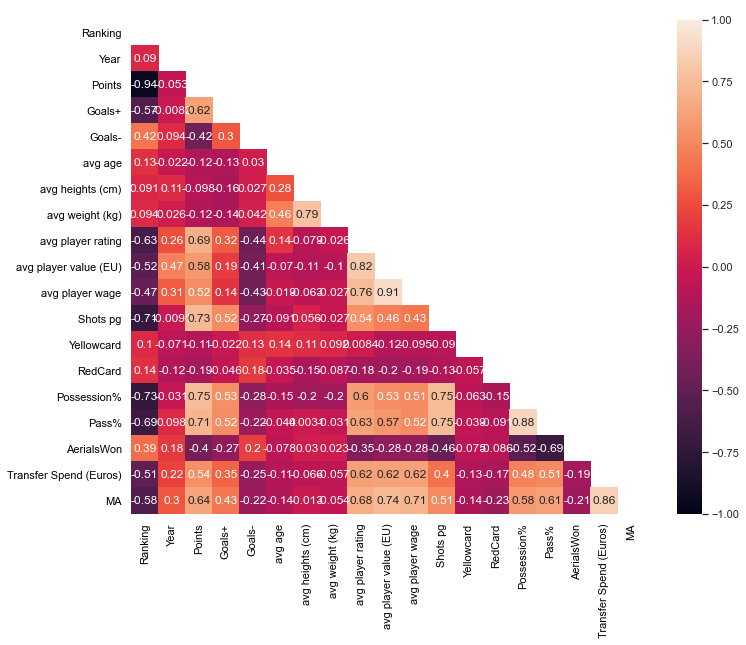

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
# Compute the correlation matrix
corr = leagues_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(50, 50, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.heatmap(corr,vmin=-1, vmax=1, annot=True,mask=mask,fmt='.2g')
plt.tight_layout()
plt.title("Correlation matrix", fontdict={"size": 25, "color":"white"},pad=-5)
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')
plt.savefig("../../../images/heatmap.png", transparent=True)
#final_df.corr()["Ranking"]

In [37]:
leagues_corr = leagues_df.corr()
leagues_corr.to_csv("../../../data/team_player/cleaned_final/correlation.csv",header=True,index=False)

In [38]:
#divide the data into attributes (independent variable X), labels(dependent variable, the prediction, y)
X = leagues_df[["Shots pg",'Possession%',"Pass%"]]
y = leagues_df["Ranking"]
# xx = leagues_df[["Shots pg",'Possession%',"Pass%"]]
# yy = leagues_df["Points"]

In [30]:
#Execute the following code to divide our data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=0)

In [32]:
'''
Linear regression
'''
#train the algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [33]:
#the regression model has to find the most optimal coefficients for all the attributes. 
#To see what #coefficients our regression model has chosen, execute the following script:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
# coeff_df = pd.DataFrame(regressor.coef_, xx.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Shots pg,-0.776545
Possession%,-0.373522
Pass%,-0.101796


[This means :] 
* for an increase of 1 unit in goals+, there is a decrease of 0.228 in ranking means closer from the top.
* for an increase of 1 unit in goals-, there is a increase of 0.22 in ranking means further from the top.
* for an increase of 1 unit in player_rate, there is a decrease of 0.32 in ranking means closer from the top.

In [34]:
#predictions
y_pred = regressor.predict(X_test)
#compare the predictions
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
375,16,12.194816
226,7,8.529929
288,9,10.963983
323,4,6.794437
211,12,12.188580


In [35]:
#Evaluation of the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.8154488264038533
Mean Squared Error: 12.53776482047826
Root Mean Squared Error: 3.540870630293948


In [70]:
'''
Logistic regression
'''
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train, y_train)
# predict the response values for the observations in X
y_pred2 = logreg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
df.head(5)

,Actual,Predicted
6,60.0,70.0
243,78.0,92.0
106,59.0,49.0
236,38.0,44.0
90,50.0,39.0


In [71]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred2))

0.027777777777777776


In [72]:
'''
KNN
'''
from sklearn.neighbors import KNeighborsClassifier
ks = {}
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred3 = knn.predict(X_test)
    ks[k] = metrics.accuracy_score(y_test, y_pred3)


Min k neighbours = 1


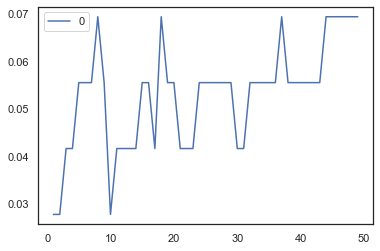

In [73]:
ks_df = pd.DataFrame.from_dict(ks, orient='index')
ks_df.plot()
print(f"Min k neighbours = {ks_df[0].idxmin()}")

In [74]:
'''
Rainforest
'''
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


regressor = RandomForestRegressor(n_estimators=1, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.583333333333334
Mean Squared Error: 176.88888888888889
Root Mean Squared Error: 13.299958228840001
